In [1]:
import scipy as sp
import numpy as np
import os
from scipy import sparse
from scipy.sparse import linalg

In [6]:
A = sparse.load_npz('sparse_matrix.npz')

In [7]:
sparse.load_npz

<function scipy.sparse._matrix_io.load_npz(file)>

In [8]:
%%prun
linalg.splu(A)

         26 function calls in 315.886 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  315.494  315.494  315.494  315.494 {built-in method scipy.sparse.linalg.dsolve._superlu.gstrf}
        1    0.387    0.387  315.884  315.884 <string>:1(<module>)
        1    0.004    0.004    0.004    0.004 {built-in method scipy.sparse._sparsetools.csr_has_canonical_format}
        1    0.002    0.002  315.886  315.886 {built-in method builtins.exec}
        1    0.000    0.000  315.498  315.498 linsolve.py:244(splu)
        1    0.000    0.000    0.004    0.004 compressed.py:1055(__get_has_canonical_format)
        1    0.000    0.000    0.000    0.000 compressed.py:1076(__set_has_canonical_format)
        1    0.000    0.000    0.000    0.000 sputils.py:332(is_pydata_spmatrix)
        1    0.000    0.000    0.000    0.000 compressed.py:107(getnnz)
        1    0.000    0.000    0.000    0.000 base.py:187(asfptype)
        2 

In [42]:
w1 = 3
w2 = 1
w3 = 7
w4 = 5
xGrid = np.linspace(0,2*np.pi,40)
yGrid = np.linspace(0,2*np.pi,40)
f1 = np.cos(w1 * xGrid)[:,None] * np.sin(w2 * yGrid)[None,:]
df1dx = -w1 * np.sin(w1 * xGrid)[:,None] * np.sin(w1 * yGrid)[None,:]
df1dy = np.cos(w1 * xGrid)[:,None] *w2 * np.cos(w1 * yGrid)[None,:]
f2 = np.sin(w3 * xGrid)[:,None]* np.sin(w4 * yGrid)[:,None]
df2dx = w3 * np.cos(w3 * xGrid)[:,None]* np.sin(w4 * yGrid)[:,None]
df2dy = np.sin(w3 * xGrid)[:,None] * w4 * np.cos(w4 * yGrid)[:,None]

In [43]:
np.sum(f1*(df1dx * df2dy - df1dy * df2dx))

7.771561172376096e-15

In [38]:
np.sum(cosx*dcosx*dsiny)

-5.329070518200751e-15

In [39]:
(df1dx * df2dy - df1dy * df2dx)

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.91632064e+00, -3.72424221e+00, -4.67898477e+00, ...,
         2.50179638e+00,  3.30606896e-01, -1.91632064e+00],
       [ 2.51284987e+00,  2.40395295e+00,  1.74433938e+00, ...,
         1.11058348e+00,  2.04608318e+00,  2.51284987e+00],
       ...,
       [-2.51284987e+00, -2.04608318e+00, -1.11058348e+00, ...,
        -1.74433938e+00, -2.40395295e+00, -2.51284987e+00],
       [ 1.91632064e+00, -3.30606896e-01, -2.50179638e+00, ...,
         4.67898477e+00,  3.72424221e+00,  1.91632064e+00],
       [ 8.57252759e-15,  7.59059621e-15,  4.86975072e-15, ...,
         4.86975072e-15,  7.59059621e-15,  8.57252759e-15]])

In [44]:
w1 = 3
w2 = 1
w3 = 7
w4 = 5
xGrid = np.linspace(0,2*np.pi,40)
yGrid = np.linspace(0,2*np.pi,40)
f1 = np.cos(w1 * xGrid)**2
df1dx = -w1 * 2 * np.sin(w1 * xGrid)[:,None] * np.cos(w1 * xGrid)
df1dy = np.cos(w1 * xGrid)[:,None] *w2 * np.cos(w1 * yGrid)[None,:]
f2 = np.sin(w3 * xGrid)**2
df2dx =2* w3 * np.cos(w3 * xGrid)* np.cos(w3 * xGrid)

In [49]:
np.sum(f1 * df1dx * df2dx)

3.979039320256561e-13

In [50]:
np.sum(df1dx*df2dx)

2.2737367544323206e-13

In [84]:
w1 = 4
w2 = 5
w3 = 7
w4 = 5
xGrid = np.linspace(0,2*np.pi,40)
yGrid = np.linspace(0,2*np.pi,40)
zGrid = np.linspace(0,2*np.pi,40)
xy = np.asarray(np.meshgrid(xGrid,yGrid))

f1 = np.cos(w1 * xy[0,...]+w2 * xy[1,...])
df1dx = -w1 * np.sin(w1 * xy[0,...]+w2 * xy[1,...])
df1dy = -w2 * np.sin(w1 * xy[0,...]+w2 * xy[1,...])

f2 = np.sin(w3 * xGrid)[:,None] * np.cos(w4 * yGrid)[None,:]
df2dx = w3 * np.cos(w3 * xGrid)[:,None] * np.cos(w4 * yGrid)[None,:]
df2dy = - w4 * np.sin(w4 *  yGrid)[None,:] * np.cos(w3 * xGrid)[:,None]

In [85]:
np.sum(f1*(df1dx * df2dy - df2dx * df1dy))

9.947598300641403e-14

In [86]:
f1[:,0]

array([ 1.        ,  0.69272435, -0.04026594, -0.74851075, -0.99675731,
       -0.63244538,  0.12053668,  0.79944276,  0.98705026,  0.56806475,
       -0.20002569, -0.84519009, -0.97094182, -0.5       ,  0.27821746,
        0.88545603,  0.94853644,  0.42869256, -0.35460489, -0.91997944,
       -0.91997944, -0.35460489,  0.42869256,  0.94853644,  0.88545603,
        0.27821746, -0.5       , -0.97094182, -0.84519009, -0.20002569,
        0.56806475,  0.98705026,  0.79944276,  0.12053668, -0.63244538,
       -0.99675731, -0.74851075, -0.04026594,  0.69272435,  1.        ])

In [87]:
xy[0,:]

array([[0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531],
       [0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531],
       [0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531],
       ...,
       [0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531],
       [0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531],
       [0.        , 0.16110732, 0.32221463, ..., 5.96097068, 6.12207799,
        6.28318531]])

In [88]:
xy[1,:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16110732, 0.16110732, 0.16110732, ..., 0.16110732, 0.16110732,
        0.16110732],
       [0.32221463, 0.32221463, 0.32221463, ..., 0.32221463, 0.32221463,
        0.32221463],
       ...,
       [5.96097068, 5.96097068, 5.96097068, ..., 5.96097068, 5.96097068,
        5.96097068],
       [6.12207799, 6.12207799, 6.12207799, ..., 6.12207799, 6.12207799,
        6.12207799],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531]])

# Eigenvalues

In [2]:
from scipy.optimize import fsolve
def stability(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4)

def stabilityEquation(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4) - 1

In [13]:
nz = 5
nm = 128
m = np.array([1,1/1854])
T = np.array([1,1])
vT = np.sqrt(2*T/m)
kz = 2 * np.pi * np.arange(nz)

In [14]:
sqrtM = np.array([np.sqrt((m+1)/2) for m in range(nm)])

In [15]:
RHS = kz[:,None,None] * sqrtM[None,:,None] * vT[None,None,:]

In [16]:
Ar = sparse.diags([RHS.flatten(),RHS.flatten()], [-1, 1]).toarray()

In [20]:
np.amax(np.sum(Ar,axis = 0))

12527.678850303819

In [21]:
1/np.amax(np.sum(Ar,axis = 1))

7.982324674420818e-05

In [22]:
2*np.amax(RHS)

24486.668684523367

In [2]:
from matplotlib import pyplot as plt
#plt.matshow(np.abs(Ar))

In [23]:
eigenvalues = sp.sparse.linalg.eigs(Ar)[0]

In [24]:
np.amax(np.abs(eigenvalues))

12417.378061840267

In [11]:
n = int(1.5 * np.ceil(np.amax(np.imag(eigenvalues))))
dt = sp.optimize.fsolve(stabilityEquation, x0 = [1], args =  1.j * np.amax(np.imag(eigenvalues)))[0]
print(f"max timestep = {dt}")
dt *=0.95
print(f"optimized timestep = {dt}")
lamR = np.linspace(-n,n/10,n)
x = np.linspace(-n,n/10,n)
lamR = lamR[:,None] * np.ones(2*n*n).reshape(n,2*n)
lamI = np.linspace(-n,n,2*n)
y = np.linspace(-n,n,2*n)
lamI = lamI[None,:] * np.ones(2*n*n).reshape(n,2*n)
lam = lamR + 1.j * lamI
mu = lam*dt
xx,yy = np.meshgrid(x,y)

max timestep = 0.005101881868528367
optimized timestep = 0.004846787775101949


In [12]:
stability(dt,1.j * np.amax(np.imag(eigenvalues)))

0.7002401653484459

In [17]:
R = 1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4

/tmp/ipykernel_3979/3349601645.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,np.abs(R).T)


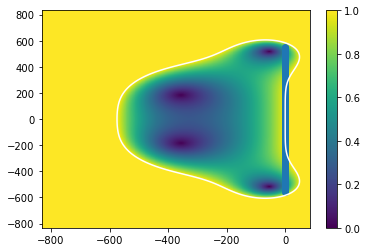

In [18]:
plt.contour(xx,yy,np.abs(R).T,[1],colors = "w")
plt.pcolormesh(xx,yy,np.abs(R).T)
plt.colorbar()
plt.clim([0,1])
plt.scatter(np.real(eigenvalues),
           np.imag(eigenvalues))

In [19]:
dic_all = {
    "sim_box" : dic_box,
    "particles" : dic_particles,
    "initial" : dic_initial,
    "solver" : dic_solver,
    "save" : dic_saving,
    "prop" : dic_systProp,
    "spectre" : dic_spectr
}

# parameter file

In [ ]:
def writeSimBox(f,boxDic):
    f.write("///////////////////////////\n")
    f.write("// simulation box size\n")
    f.write("///////////////////////////\n")
    for key in boxDic :
        f.write(f"{key} : {boxDic[key]}\n")
    f.write("\n")
        
def writeDealiasing(f,param):
    f.write("/////////////////////////////\n")
    f.write("// dealiasing routine\n")
    f.write("// 0 - no dealiasing is used\n")
    f.write("// 1 - 2/3 rule\n")
    f.write("/////////////////////////////\n")
    f.write(f"dealiasing : {param}\n\n")

def writeParticles(f, boxPar):
    f.write("/////////////////////////////\n")
    f.write("//	particles properties\n")
    f.write("//		format:\n")
    f.write("// 			particle: n       \\\\index of the particle\n")
    f.write("//					density: dens \\\\ densiity\n")
    f.write("//					mass: m   	  \\\\mass of the particle\n")
    f.write("//					charge: q 	  \\\\charge of the particle\n")
    f.write("//                 T: T          \\\\temperature of the particle\n")
    f.write("/////////////////////////////\n")
    for particle in range(boxPar["particles"]):
        f.write(f"particle : {particle}\n")
        for key in boxPar:
            if key != "particles":
                f.write(f"	{key} : {boxPar[key][particle]}\n")
        f.write("\n")
            
def writeDiagnostics(f, param):
    f.write("///////////////////////////\n")
    f.write("// system properties\n")
    f.write("///////////////////////////\n")
    f.write(f"compute_every : {param}\n")
    f.write("\n")
    
def writeInital(f, initialDic):
    f.write("///////////////////////////\n")
    f.write("// initial conditions\n")
    f.write("///////////////////////////\n")
    initial = initialDic["initial"]
    sim_name = initialDic["simulation_name"]
    f.write(f"initial : {initial} //// 0 - random, 1 - from file\n")
    f.write(f"simulation_name : {sim_name} \n")
    f.write("\n")

def writeSolver(f, solverDic):
    f.write("///////////////////////////\n")
    f.write("// solver\n")
    f.write("///////////////////////////\n")
    for key in solverDic :
        if key == "dt":
            f.write(f"{key} : {solverDic[key]:.6f}\n")
        else:
            f.write(f"{key} : {solverDic[key]}\n")
        
    f.write("\n")
    
def writeSaving(f, savingDic):
    f.write("///////////////////////////\n")
    f.write("// saving\n")
    f.write("///////////////////////////\n")
    for key in savingDic:
        f.write(f"{key} : {savingDic[key]}\n")
    f.write("\n")
        
def writeSystProp(f, propDic):
    f.write("///////////////////////////\n")
    f.write("// system properties\n")
    f.write("///////////////////////////\n")
    for key in propDic:
        f.write(f"{key} : {propDic[key]}\n")
    f.write("\n")

def writeSpectrum(f, specDic):
    f.write("///////////////////////////\n")
    f.write("// spectrum\n")
    f.write("///////////////////////////\n")
    for key in specDic:
        f.write(f"{key} : {specDic[key]}\n")
    f.write("\n")
        

In [ ]:
def createParameterFile(filename,allDic):
    with open(filename, 'w') as f:
        writeSimBox(f,allDic["sim_box"])
        writeDealiasing(f,1)
        writeParticles(f, allDic["particles"])
        writeDiagnostics(f, 0)
        writeSystProp(f, allDic["prop"])
        writeInital(f, allDic["initial"])
        writeSolver(f, allDic["solver"])
        writeSaving(f, allDic["save"])
        writeSpectrum(f, allDic["spectre"])

In [ ]:
createParameterFile("test.txt",dic_all)

# SIM LOOP

In [55]:
from scipy.optimize import fsolve
def stability(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4)

def stabilityEquation(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4) - 1

In [56]:
nz = 5
nm = 128
m = np.array([1,1])
T = np.array([1,1])
vT = np.sqrt(2*T/m)
kz = 2 * np.pi * np.arange(nz)

In [57]:
sqrtM = np.array([np.sqrt((m+1)/2) for m in range(nm)])

In [58]:
RHS = 1.j * kz[:,None,None] * sqrtM[None,:,None] * vT[None,None,:]

In [59]:
Ar = sparse.diags([RHS.flatten(),RHS.flatten()], [-1, 1]).toarray()

In [60]:
from matplotlib import pyplot as plt
#plt.matshow(np.abs(Ar))

In [61]:
eigenvalues = sp.linalg.eig(Ar)[0]

In [62]:
SAFETY_FACTOR = 0.8
n = int(1.5 * np.ceil(np.amax(np.imag(eigenvalues))))
dt = sp.optimize.fsolve(stabilityEquation, x0 = [1], args =  1.j * np.amax(np.imag(eigenvalues)))[0]
print(f"max timestep = {dt}")
dt *=SAFETY_FACTOR
print(f"optimized timestep = {dt}")
lamR = np.linspace(-n,n/10,n)
x = np.linspace(-n,n/10,n)
lamR = lamR[:,None] * np.ones(2*n*n).reshape(n,2*n)
lamI = np.linspace(-n,n,2*n)
y = np.linspace(-n,n,2*n)
lamI = lamI[None,:] * np.ones(2*n*n).reshape(n,2*n)
lam = lamR + 1.j * lamI
mu = lam*dt
xx,yy = np.meshgrid(x,y)

max timestep = 0.005101881868528367
optimized timestep = 0.004081505494822694


In [70]:
stability(dt,1.j * np.amax(np.imag(eigenvalues)))

0.7002401653484459

In [71]:
R = 1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4

/tmp/ipykernel_3979/3349601645.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,np.abs(R).T)


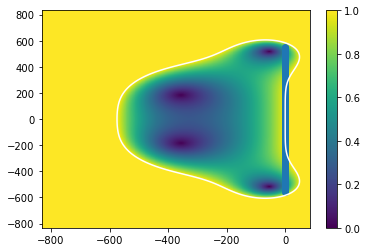

In [72]:
plt.contour(xx,yy,np.abs(R).T,[1],colors = "w")
plt.pcolormesh(xx,yy,np.abs(R).T)
plt.colorbar()
plt.clim([0,1])
plt.scatter(np.real(eigenvalues),
           np.imag(eigenvalues))

In [73]:
dt_list = [dt/x for x in [1,2,3,4,6,8,12,16,24]]
timesteps = [int(np.ceil(1000 * dt_list[0] / timestep)) for timestep in dt_list]

for i in range(len(dt_list)):
    dt = dt_list[i]
    Nt = timesteps[i]
    dic_all["solver"]["dt"] = dt
    dic_all["solver"]["timesteps"] = Nt
    createParameterFile(f"test_{i}.txt",dic_all)

In [74]:
dt_list

[0.004846787775101949,
 0.0024233938875509744,
 0.0016155959250339828,
 0.0012116969437754872,
 0.0008077979625169914,
 0.0006058484718877436,
 0.0004038989812584957,
 0.0003029242359438718,
 0.00020194949062924786]

In [75]:
timesteps

[1000, 2000, 3000, 4000, 6000, 8000, 12000, 16000, 24000]

In [76]:
dic_all["dic_box"]

KeyError: 'dic_box'

In [77]:
dic_all

{'sim_box': {'nkx': 8, 'nky': 8, 'nkz': 5, 'nm': 128, 'nl': 2, 'ns': 2},
 'particles': {'particles': 2,
  'density': [1, 1],
  'charge': [-1, 1],
  'mass': [1, 1],
  'T': [1, 1]},
 'initial': {'initial': 0, 'simulation_name': 'checkpoint.h5'},
 'solver': {'timesteps': 24000, 'dt': 0.00020194949062924786},
 'save': {'save_directory': 'test',
  'checkpoints': 2,
  'iter_checkpoint': 100,
  'save_distribution': 0,
  'iter_distribution': 100,
  'save_EMfield': 0,
  'iter_EMfield': 100,
  'save_diagnostics': 1,
  'iter_diagnostics': 10},
 'prop': {'electromagnetic': 1, 'adiabatic': 0, 'beta': 1.0},
 'spectre': {'compute_k': 10,
  'compute_m': 10,
  'k_shells': 8,
  'first_shell': 0.0,
  'last_shell': 6.14}}

# CONVERGENCE TEST LOOP

In [13]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
def stability(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4)

def stabilityEquation(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4) - 1

In [23]:
# prepare work folder 
HOME_PATH = "/home"
USER_PATH = "alcauchy"
PROJECTS_PATH = "CLionProjects"
PROJECT_FOLDER = "Alliance_alpha_1.0"
WORK_FOLDER = "wrk"
BIN_FOLDER = "bin"
SIM_FOLDER = "linear_convergence"
SIM_PATH = os.path.join(HOME_PATH,
                        USER_PATH,
                        PROJECTS_PATH,
                        PROJECT_FOLDER,
                        WORK_FOLDER,
                        SIM_FOLDER)
BIN_PATH = os.path.join(HOME_PATH,
                        USER_PATH,
                        PROJECTS_PATH,
                        PROJECT_FOLDER,
                        BIN_FOLDER)


In [24]:
BIN_PATH

'/home/alcauchy/CLionProjects/Alliance_alpha_1.0/bin'

In [25]:
if os.path.isdir(SIM_PATH):
    print("noice")

noice


In [26]:
nz = 5
nm = 128
m = np.array([1/1836,1])
T = np.array([1,1])
vT = np.sqrt(2*T/m)
kz = 2 * np.pi * np.arange(nz)

In [27]:
sqrtM = np.array([np.sqrt((m+1)/2) for m in range(nm)])
RHS = 1.j * kz[:,None,None] * sqrtM[None,:,None] * vT[None,None,:]
Ar = sparse.diags([RHS.flatten(),RHS.flatten()], [-1, 1]).toarray()

In [28]:
dic_box = {
    "nkx" : 8,
    "nky" : 8,
    "nz" : 8,
    "nm"  : nm,
    "nl"  : 2,
    "ns"  : 2
}

dic_particles = {
    "particles" : 2,
    "density"   : [1,1],
    "charge"    : [-1, 1],
    "mass"      : m,
    "T"         : T
}

dic_initial = {
    "initial" : 0,
    "simulation_name" : "checkpoint.h5"
}

dic_solver = {
    "timesteps" : 2000,
    "dt"        : 0.0075
}

dic_saving = {
    "save_directory" : "test",
    "checkpoints" : 0,
    "iter_checkpoint" : 100,
    "save_distribution" : 0,
    "iter_distribution" : 100,
    "save_EMfield" : 0,
    "iter_EMfield" : 100,
    "save_diagnostics" : 1,
    "iter_diagnostics" : 10
}

dic_systProp = {
    "electromagnetic" : 1,
    "adiabatic" : 0, 
    "beta" : 1.0	
}

dic_spectr = {
    "compute_k" : 10,
    "compute_m" : 10,
    "k_shells" : 8,
    "first_shell" : 0.0,
    "last_shell" : 6.14
}

In [29]:
dic_all = {
    "sim_box" : dic_box,
    "particles" : dic_particles,
    "initial" : dic_initial,
    "solver" : dic_solver,
    "save" : dic_saving,
    "prop" : dic_systProp,
    "spectre" : dic_spectr
}

In [30]:
eigenvalues = sp.linalg.eig(Ar)[0]

In [99]:
SAFETY_FACTOR = 0.5
n = int(1.5 * np.ceil(np.amax(np.imag(eigenvalues))))*1.5
dt = sp.optimize.fsolve(stabilityEquation, x0 = [1], args =  1.j * np.amax(np.imag(eigenvalues)))[0]
print(f"max timestep = {dt}")
dt *=SAFETY_FACTOR
print(f"optimized timestep = {dt}")
Nn = 500
lamR = np.linspace(-n,n/10,Nn)
x = np.linspace(-n,n/10,Nn)
lamR = lamR[:,None] * np.ones(2*Nn*Nn).reshape(Nn,2*Nn)
lamI = np.linspace(-n,n,2*Nn)
y = np.linspace(-n,n,2*Nn)
lamI = lamI[None,:] * np.ones(2*Nn*Nn).reshape(Nn,2*Nn)
lam = lamR + 1.j * lamI
mu = lam*dt
xx,yy = np.meshgrid(x,y)

max timestep = 0.00022887292572869452
optimized timestep = 0.00011443646286434726


In [100]:
stability(dt,1.j * np.amax(np.imag(eigenvalues)))

0.9574271077563381

In [101]:
R = 1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4

/tmp/ipykernel_3005/1548241714.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax.pcolormesh(xx,yy,np.abs(R).T,vmin=0, vmax=1,rasterized=True)


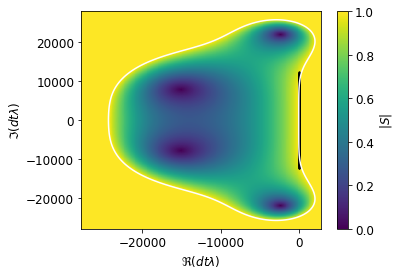

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx,yy,np.abs(R).T,[1],colors = "w")
im1 = ax.pcolormesh(xx,yy,np.abs(R).T,vmin=0, vmax=1,rasterized=True)
#cbar = plt.colorbar()
#cbar.set_label(r"$| S |$")
#plt.clim([0,1])
cbar = fig.colorbar(im1, ax=ax)
cbar.set_label(r"$| S |$")

ax.scatter(np.real(eigenvalues),
           np.imag(eigenvalues),color = "k",s = 1)
ax.set_ylabel(r"$\Im(dt\lambda )$")
ax.set_xlabel(r"$\Re(dt \lambda )$")
ax.set_aspect(0.5)
plt.savefig("stabilityRegion.eps")

In [3]:
initialNt = 2000
dt_list = [dt/x for x in [1,2,3,4,6,8,12,16,24]]
timesteps = [int(np.ceil(initialNt * dt_list[0] / timestep)) for timestep in dt_list]
import subprocess
bin_name = os.path.join(BIN_PATH, "Alliance_alpha_1_0")
for i in range(len(dt_list)):
    dt_i = dt_list[i]
    Nt = timesteps[i]
    dic_all["solver"]["dt"] = dt_i
    dic_all["solver"]["timesteps"] = Nt
    parameter_filename = os.path.join(SIM_PATH,f"parameters_{i}.txt")
    createParameterFile(parameter_filename,dic_all)
    subprocess.call(f"mpiexec -n 16 {bin_name} -f {parameter_filename} > sim_{i}.log", shell = True)
    print(f"completed {i} sim")

NameError: name 'dt' is not defined

In [36]:
dt_list

[0.00011443646286434726,
 5.721823143217363e-05,
 3.814548762144909e-05,
 2.8609115716086815e-05,
 1.9072743810724543e-05,
 1.4304557858043408e-05,
 9.536371905362272e-06,
 7.152278929021704e-06,
 4.768185952681136e-06]

In [15]:
dt_list = np.array([0.00011443646286434726,
 5.721823143217363e-05,
 3.814548762144909e-05,
 2.8609115716086815e-05,
 1.9072743810724543e-05,
 1.4304557858043408e-05,
 9.536371905362272e-06,
 7.152278929021704e-06,
 4.768185952681136e-06])

In [16]:
lines = []
for i in range(len(dt_list)):
    with open(f"sim_{i}.log") as f:
        lines.append(f.readlines()[-1])

In [17]:
lines

['W = 0.8375083150466054\n',
 'W = 0.9207162555164260\n',
 'W = 0.9638066382406074\n',
 'W = 0.9834826445223194\n',
 'W = 0.9973116423775787\n',
 'W = 0.9994003375255328\n',
 'W = 0.9998791308847621\n',
 'W = 0.9999809756281630\n',
 'W = 0.9999962060986749\n']

In [18]:
W_last = []
for line in lines:
    W_last.append( float(line.split(" ")[2]))

In [19]:
W_last = np.array(W_last)

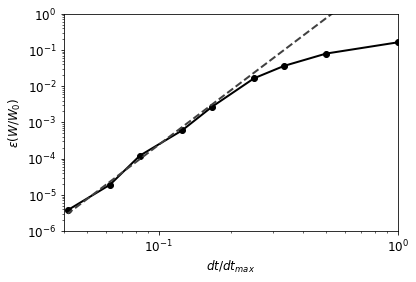

In [22]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
plt.loglog(dt_list/dt_list[0],1 - W_last,color = 'k',linewidth = 2,marker = "o")
plt.loglog(dt_list/dt_list[0], (1 - W_last)[-1]/np.array(dt_list[-1])**5*np.array(dt_list)**5*0.8,linestyle = '--',color = [0.25,0.25,0.25],linewidth = 2)
plt.xlim([4e-2,1])
plt.ylim([1e-6,1])
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$\epsilon(W/W_{0})$")
plt.savefig("convergence.pdf", bbox_inches='tight')

# NONLINEAR ENERGY GROWTH TEST

In [ ]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

In [75]:
# prepare work folder 
HOME_PATH = "/home"
USER_PATH = "alcauchy"
PROJECTS_PATH = "CLionProjects"
PROJECT_FOLDER = "Alliance_alpha_1.0"
WORK_FOLDER = "wrk"
BIN_FOLDER = "bin"
SIM_FOLDER = "nonlinear_growth"
SIM_PATH = os.path.join(HOME_PATH,
                        USER_PATH,
                        PROJECTS_PATH,
                        PROJECT_FOLDER,
                        WORK_FOLDER,
                        SIM_FOLDER)
BIN_PATH = os.path.join(HOME_PATH,
                        USER_PATH,
                        PROJECTS_PATH,
                        PROJECT_FOLDER,
                        BIN_FOLDER)


In [76]:
BIN_PATH

'/home/alcauchy/CLionProjects/Alliance_alpha_1.0/bin'

In [77]:
if os.path.isdir(SIM_PATH):
    print("noice")

noice


In [78]:
nkx = 64
nky = 64
nz = 16
nm = 16
m = np.array([1,1])
T = np.array([1,1])
vT = np.sqrt(2*T/m)
dt = 0.5
kz = 2 * np.pi * np.arange(nz)

In [83]:
dic_box

{'nkx': 64, 'nky': 64, 'nz': 16, 'nm': 16, 'nl': 2, 'ns': 2}

In [82]:
dic_box = {
    "nkx" : nkx,
    "nky" : nky,
    "nz" : nz,
    "nm"  : nm,
    "nl"  : 2,
    "ns"  : 2
}

dic_particles = {
    "particles" : 2,
    "density"   : [1,1],
    "charge"    : [-1, 1],
    "mass"      : m,
    "T"         : T
}

dic_initial = {
    "initial" : 1,
    "simulation_name" : "h_chk.h5"
}

dic_solver = {
    "timesteps" : 1000,
    "dt"        : dt
}

dic_saving = {
    "save_directory" : "test",
    "checkpoints" : 2,
    "iter_checkpoint" : 100,
    "save_distribution" : 0,
    "iter_distribution" : 100,
    "save_EMfield" : 0,
    "iter_EMfield" : 100,
    "save_diagnostics" : 1,
    "iter_diagnostics" : 10
}

dic_systProp = {
    "electromagnetic" : 1,
    "adiabatic" : 0, 
    "beta" : 1.0	
}

dic_spectr = {
    "compute_k" : 10,
    "compute_m" : 10,
    "k_shells" : 30,
    "first_shell" : 0.0,
    "last_shell" : 2.0
}

In [80]:
dic_all = {
    "sim_box" : dic_box,
    "particles" : dic_particles,
    "initial" : dic_initial,
    "solver" : dic_solver,
    "save" : dic_saving,
    "prop" : dic_systProp,
    "spectre" : dic_spectr
}

In [84]:
parameterH5_filename = os.path.join(f"parameters.h5")
initialNt = 1000
dt = 0.5
procNum = 16
dt_list = [dt/x for x in [1,2,3,4,6,8]]
print(dt_list)
timesteps = [int(np.ceil(initialNt * dt_list[0] / timestep)) for timestep in dt_list]
print(timesteps)
import subprocess
bin_name = os.path.join(BIN_PATH, "Alliance_alpha_1_0")
for i in range(len(dt_list)):
    dt_i = dt_list[i]
    Nt = timesteps[i]
    dic_all["solver"]["dt"] = dt_i
    dic_all["solver"]["timesteps"] = Nt
    parameter_filename = os.path.join(SIM_PATH,f"parameters_{i}.txt")
    
    createParameterFile(parameter_filename,dic_all)
    subprocess.call(f"mpiexec -n {procNum} {bin_name} -f {parameter_filename} > sim_{i}.log", shell = True)
    if os.path.exists(parameterH5_filename):
        parametersH5_newName = os.path.join(SIM_PATH,f"dt_{dt_i}.h5")
        os.rename(parameterH5_filename,parametersH5_newName)
    print(f"completed {i} sim")

[0.5, 0.25, 0.16666666666666666, 0.125, 0.08333333333333333, 0.0625]
[1000, 2000, 3000, 4000, 6000, 8000]


KeyboardInterrupt: 

In [ ]:
dt_list

In [37]:
lines = []
for i in range(len(dt_list)):
    with open(f"sim_{i}.log") as f:
        lines.append(f.readlines()[-1])

In [38]:
lines

['W = 0.8375083150466054\n',
 'W = 0.9207162555164260\n',
 'W = 0.9638066382406074\n',
 'W = 0.9834826445223194\n',
 'W = 0.9973116423775787\n',
 'W = 0.9994003375255328\n',
 'W = 0.9998791308847621\n',
 'W = 0.9999809756281630\n',
 'W = 0.9999962060986749\n']

In [39]:
W_last = []
for line in lines:
    W_last.append( float(line.split(" ")[2]))

In [40]:
W_last = np.array(W_last)

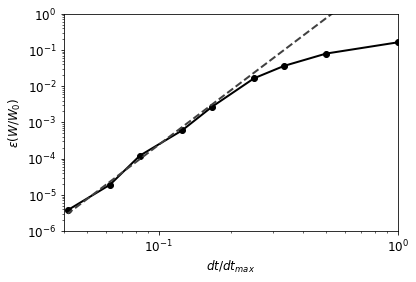

In [48]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
plt.loglog(dt_list/dt_list[0],1 - W_last,color = 'k',linewidth = 2,marker = "o")
plt.loglog(dt_list/dt_list[0], (1 - W_last)[-1]/np.array(dt_list[-1])**5*np.array(dt_list)**5*0.8,linestyle = '--',color = [0.25,0.25,0.25],linewidth = 2)
plt.xlim([4e-2,1])
plt.ylim([1e-6,1])
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$\epsilon(W/W_{0})$")
plt.savefig("convergence.eps")

In [42]:
x = np.linspace(0,10,1000)

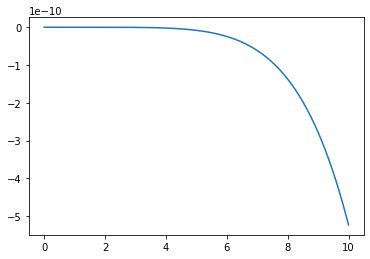

In [43]:
lam = 1.j*0.0065
plt.plot(x,np.abs(1+x*lam+0.5*(lam*x)**2+1/6*(lam*x)**3+1/24*(lam*x)**4)-1)


In [44]:
1/1836

0.0005446623093681918